In [4]:
import pandas as pd
import numpy as np

In [5]:
dct = {
    "Component" : ["C1","C2","C3","C4","C5","C6","C7+"],
    "yi" : [0.7,0.05,0.05,0.04,0.04,0.02,0.01],
    "Pc" : [666.4,706.5,616,527.9,488.6,453,285],
    "Tc" : [343.33,549.92,666.06,765.62,845.8,923,1160],
    "wi" : [0.0104,0.0979,0.1522,0.1852,0.228,0.25,0.5721],
    "MW" : [16,30,44,58,72,86,240]
}
df = pd.DataFrame(dct)

In [6]:
df.to_excel('pr3.xlsx',index=False)

In [7]:
P = 2100 #psia
T = 110+460 #(F)+460, Rankine
R = 10.731557089016 #psi.ft3/(lbmol.R)

In [8]:
#Kappa Calculation
wi = np.asarray(df['wi'],dtype=float)
kp = 0.37464+1.54226*wi-0.26992*wi**2

In [9]:
print(kp)

[0.39065031 0.52304023 0.60311932 0.65100856 0.71224376 0.743335
 1.16862256]


In [10]:
pc = np.asarray(df['Pc'],dtype=float)
tc = np.asarray(df['Tc'],dtype=float)
tr = T/tc

alph = (1+kp*(1-np.sqrt(tr)))**2
ai = 0.45724*R**2*tc**2/pc
bi = 0.0778*R*tc/pc

In [11]:
print(alph)
print(ai)
print(bi)

[0.78730256 0.98116229 1.09240923 1.18655631 1.27135752 1.34371991
 1.82097812]
[  9314.47143533  22540.13744558  37924.1355756   58471.54564846
  77099.50602575  99031.85102226 248622.72089599]
[0.43014918 0.64987478 0.90276555 1.21088792 1.44529518 1.70116264
 3.3982511 ]


In [12]:
l = len(df)
y = np.asarray(df['yi'],dtype=float)

aam = 0
for i in range(l):
    for j in range(l):
        aam = aam + y[i]*y[j]*np.sqrt(ai[i]*ai[j]*alph[i]*alph[j])
bm  = sum(y*bi)
print("aam = %f"%aam,"bm = %f"%bm)

aam = 13142.482864 bm = 0.552990


In [13]:
A = aam*P/(R**2*T**2)
B = bm*P/(R*T)
print("A = %f"%A,"B = %f"%B)

A = 0.737601 B = 0.189845


In [14]:
# t# as polynomial term (t1)x^3+(t2)x^2+(t3)x+(t4)
t1 = 1
t2 = -(1-B)
t3 = A-3*B**2-2*B
t4 = -(A*B-B**2-B**3)

In [15]:
p = np.poly1d([t1,t2,t3,t4])
rt = p.roots
print(rt)

[0.65521125+0.j         0.077472  +0.37718096j 0.077472  -0.37718096j]


In [16]:
p

poly1d([ 1.        , -0.81015524,  0.24978843, -0.09714646])

In [17]:
#Real and Imaginer Number Identification
cond = 0
count_real = sum(rt.imag == 0)
if count_real == 1:
    cond = 1
    print("1 root real number, fluid in one phase condition at T =",T,"R and P =",P,"psig")
elif count_real == 3:
    cond = 2
    print("3 real number, fluid in two phase condition at T =",T,"R and P =",P,"psig") 

1 root real number, fluid in one phase condition at T = 570 R and P = 2100 psig


In [18]:
zEOS = rt[rt.imag == 0].real[0]

In [19]:
zEOS

0.655211249958065

In [20]:
MW = np.asarray(df["MW"],dtype=int)
MWa = sum(y*MW)
GamG = MWa/28.97

In [21]:
Ppc = sum(y*pc)
Tpc = sum(y*tc)
Ppc,Tpc

(585.1749999999998, 395.6467999999999)

In [22]:
#FVG Gas Calculation
Bgi = 0.0283*zEOS*T/P
# ft3/scf

In [23]:
Bgi

0.005032958415749307

In [24]:
#Monte Carlo

In [25]:
Ar = [200,500] #acre
h = [5,10] #ft
phi = [0.01,0.3,0.1] #fraction
sw = [0.05,0.2,0.15] #fraction

N = 10000000

In [26]:
random_Ar = np.random.uniform(Ar[0],Ar[1],N)
random_h = np.random.uniform(h[0],h[1],N)
random_phi = np.random.triangular(phi[0],phi[2],phi[1],N)
random_sw = np.random.triangular(sw[0],sw[2],sw[1],N)
random_bg = np.random.normal(Bgi,0.0005,size=N)

In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

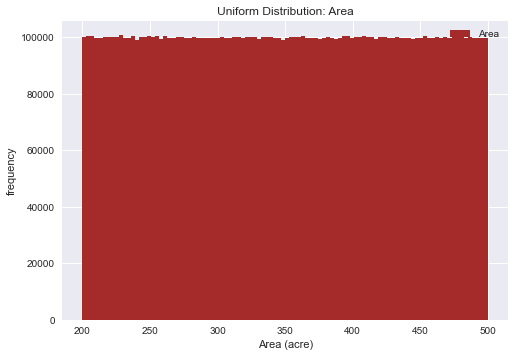

In [28]:
plt.hist(random_Ar,color='brown',bins=100,label='Area')
plt.title('Uniform Distribution: Area')
plt.xlabel('Area (acre)')
plt.ylabel('frequency')
plt.legend()
plt.show()

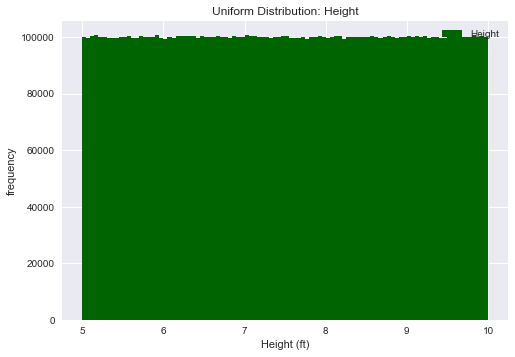

In [29]:
plt.hist(random_h,color='darkgreen',bins=100,label='Height')
plt.title('Uniform Distribution: Height')
plt.xlabel('Height (ft)')
plt.ylabel('frequency')
plt.legend()
plt.show()

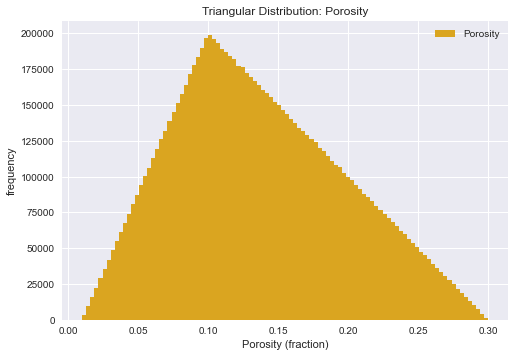

In [30]:
plt.hist(random_phi,color='goldenrod',bins=100,label='Porosity')
plt.title('Triangular Distribution: Porosity')
plt.xlabel('Porosity (fraction)')
plt.ylabel('frequency')
plt.legend()
plt.show()

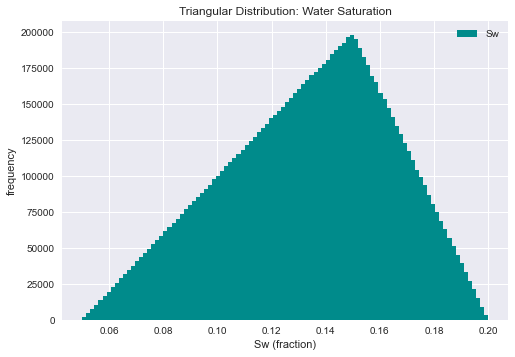

In [31]:
plt.hist(random_sw,color='darkcyan',bins=100,label='Sw')
plt.title('Triangular Distribution: Water Saturation')
plt.xlabel('Sw (fraction)')
plt.ylabel('frequency')
plt.legend()
plt.show()

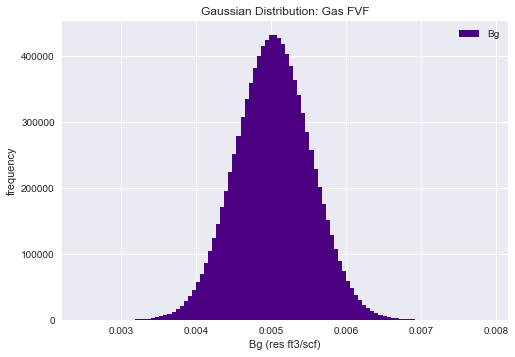

In [32]:
plt.hist(random_bg,color='indigo',bins=100,label='Bg')
plt.title('Gaussian Distribution: Gas FVF')
plt.xlabel('Bg (res ft3/scf)')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [33]:
G_sim = random_Ar*random_h*random_phi*(1-random_sw)/random_bg*43560

In [34]:
G_sim_BSCF = G_sim/10**9

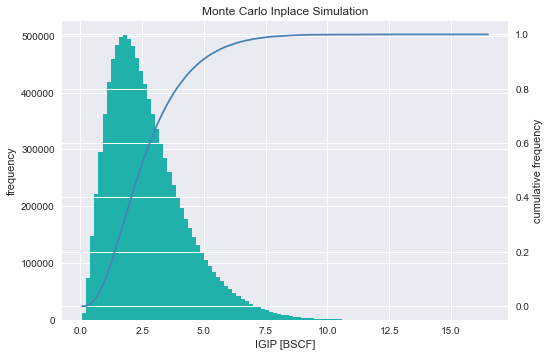

In [35]:
x = np.sort(G_sim_BSCF)
y = np.arange(1,len(x)+1)/len(x)

fig,ax1 = plt.subplots()
plt.title("Monte Carlo Inplace Simulation")
ax2 = ax1.twinx()

ax1.hist(G_sim_BSCF,color='lightseagreen',bins=100)
ax1.set_xlabel('IGIP [BSCF]')
ax1.set_ylabel('frequency')
ax2.plot(x,y,linestyle=None,color='steelblue',label='cumulative freq')
ax2.set_ylabel('cumulative frequency')
plt.show()

In [36]:
print("P10 = %f BSCF"%(np.percentile(x,90)))
print("P50 = %f BSCF"%(np.percentile(x,50)))
print("P90 = %f BSCF"%(np.percentile(x,10)))

P10 = 4.868214 BSCF
P50 = 2.404056 BSCF
P90 = 1.008372 BSCF
